# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [99]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/idriod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/idriod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/idriod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/idriod/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [62]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv("data/20-newsgroups.csv")
print(df.shape)

(11314, 4)


In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df.duplicated().sum()

0

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [63]:
# 1. Make a function that makes all text lowercase.

def lowerWords(txt):
    return txt.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

x = lowerWords(test_string)
x

'this is a sentence with lots of caps.'

In [64]:
# 2. Make a function that removes all punctuation. 
def removePunctuation(txt):
    txt = re.sub(r'[^\w\s]','',txt)
    return txt


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
x = removePunctuation(test_string)

In [65]:
# 3. Make a function that removes all stopwords.
def removeStopWords(txt):
    txt = word_tokenize(txt)
    valid_words = []
    
    for word in txt:
        if word not in stopwords:
            valid_words.append(word)
            
    txt = ' '.join(valid_words)
    
    return txt

test_string = 'This is a sentence! With some different stopwords i have added in here.'
x = removeStopWords(test_string)
x

'This sentence ! With different stopwords added .'

In [66]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stemWords(txt):
    porter = PorterStemmer()
    
    words = word_tokenize(txt)
    
    valid_words = []
    
    for word in words:
        
        stemmed_words = porter.stem(word)
        
        valid_words.append(stemmed_words)
        
    txt = ' '.join(valid_words)
    
    return txt 


test_string = 'I played and started playing with players and we all love to play with plays'


x = stemWords(test_string)
x


'i play and start play with player and we all love to play with play'

In [67]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def textPipeline(txt):
    txt = lowerWords(txt)
    txt = removePunctuation(txt)
    txt = removeStopWords(txt)
    return txt

test_string = 'I played and started playing with players and we all love to play with plays'

x = textPipeline(test_string)
x


'played started playing players love play plays'

In [68]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['clean_message'] = df['message'].apply(textPipeline)
df.head()

,id,message,topic,topic_category,clean_message
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [69]:
# 1. Define your `X` and `y` data. 

X = df['clean_message']
y = df['topic_category']

In [70]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [71]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)
X

0        lerxstwamumdedu wheres thing subject car nntpp...
1        guykuocarsonuwashingtonedu guy kuo subject si ...
2        twillisececnpurdueedu thomas e willis subject ...
3        jgreenamber joe green subject weitek p9000 org...
4        jcmheadcfaharvardedu jonathan mcdowell subject...
                               ...                        
11309    jimzisfeinfactorycom jim zisfein subject migra...
11310    ebodinpearltuftsedu subject screen death mac p...
11311    westesnetcomcom estes subject mounting cpu coo...
11312    stevehcrlgw steven collins subject sphere 4 po...
11313    gunningccocaltechedu kevin j gunning subject s...
Name: clean_message, Length: 11314, dtype: object

In [75]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

AttributeError: lower not found

In [78]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape, type(X))

(11314, 139767) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [16]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_text = X_train
X_test_text = X_test

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [17]:
# 1. Initalize an empty model. 

model = MultinomialNB()

In [18]:
# Fit our model with our training data.


model.fit(X_train, y_train)

MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [19]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [21]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.882015


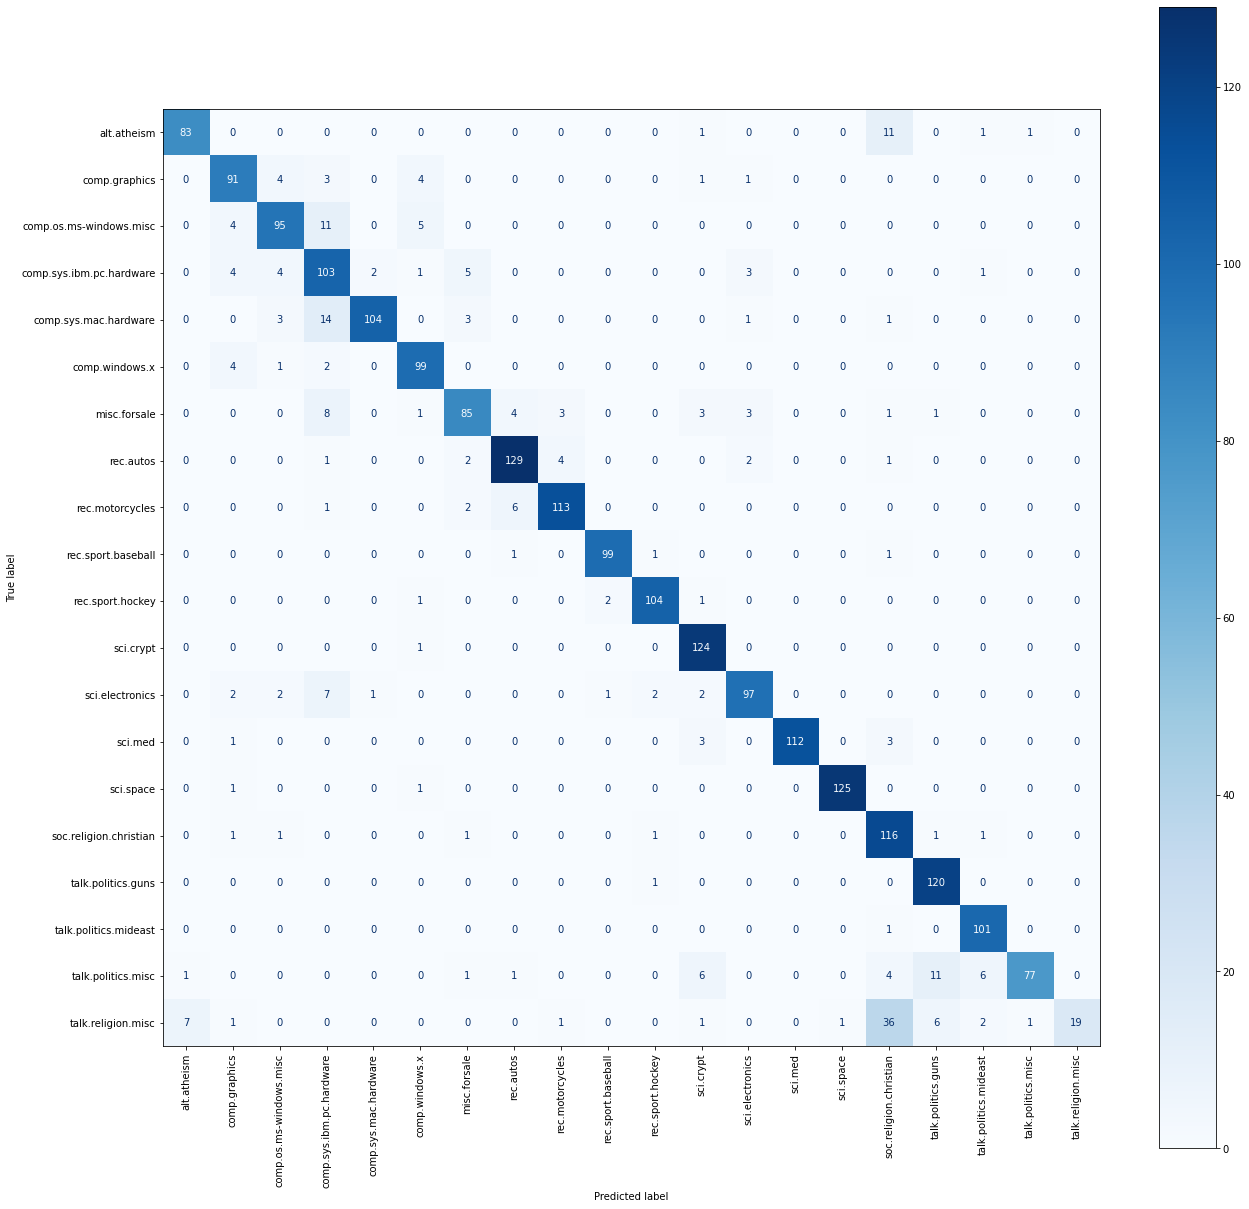

In [26]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21,21))

disp = plot_confusion_matrix(model, X_test, y_test,
                            display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=90)
disp

In [27]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.91      0.86      0.88        97
           comp.graphics       0.83      0.88      0.85       104
 comp.os.ms-windows.misc       0.86      0.83      0.84       115
comp.sys.ibm.pc.hardware       0.69      0.84      0.75       123
   comp.sys.mac.hardware       0.97      0.83      0.89       126
          comp.windows.x       0.88      0.93      0.90       106
            misc.forsale       0.86      0.78      0.82       109
               rec.autos       0.91      0.93      0.92       139
         rec.motorcycles       0.93      0.93      0.93       122
      rec.sport.baseball       0.97      0.97      0.97       102
        rec.sport.hockey       0.95      0.96      0.96       108
               sci.crypt       0.87      0.99      0.93       125
         sci.electronics       0.91      0.85      0.88       114
                 sci.med       1.00      0.94      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [41]:
my_sentence = '''Those leftist are coming for our guns. Read teh CONSTITUTION, my right is in there. 
                 I just wish these leftist would come for my gun, then Ill show u my rights as an American'''

# 1. Apply the text pipeline to your sentence

new_sentence = textPipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

piped_senctence = vectorizer.transform([new_sentence])

# 3. Use the model to predict your new `X`. 

y_pred = model.predict(piped_senctence)
y_proba = model.predict_proba(piped_senctence)

# 4. Print the prediction

for class_name, percentage in zip(model.classes_, y_proba.round(3)[0]):
    print(class_name, percentage)


alt.atheism 0.045
comp.graphics 0.022
comp.os.ms-windows.misc 0.021
comp.sys.ibm.pc.hardware 0.023
comp.sys.mac.hardware 0.025
comp.windows.x 0.022
misc.forsale 0.02
rec.autos 0.038
rec.motorcycles 0.033
rec.sport.baseball 0.035
rec.sport.hockey 0.042
sci.crypt 0.067
sci.electronics 0.03
sci.med 0.034
sci.space 0.047
soc.religion.christian 0.055
talk.politics.guns 0.258
talk.politics.mideast 0.08
talk.politics.misc 0.079
talk.religion.misc 0.025


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [104]:
def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

In [105]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

In [106]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [117]:
df['Party'].value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

In [112]:
df['clean_tweet'] = df['Tweet'].apply(textPipeline)
# df['clean_tweet'] = df['clean_tweet'].apply(stemWords)
# df['clean_tweet'] = df['clean_tweet'].apply(lem_with_pos_tag)

X = df['clean_tweet']
y = df['Party']

df.head()

,Party,Handle,Tweet,clean_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1st ...


In [118]:
#split test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#change string to floats for NultinomialNB
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# y_pred_proba = model.predict_proba(X_test)

print(classification_report(y_test, y_pred, target_names=model.classes_))

# fig, ax = plt.subplots(figsize=(21,21))

# disp = plot_confusion_matrix(model, X_test, y_test,
#                             display_labels=model.classes_,
#                             cmap=plt.cm.Blues, ax=ax)

# plt.xticks(rotation=90)
# disp

              precision    recall  f1-score   support

    Democrat       0.84      0.73      0.78      8447
  Republican       0.77      0.87      0.82      8845

    accuracy                           0.80     17292
   macro avg       0.81      0.80      0.80     17292
weighted avg       0.81      0.80      0.80     17292

